<a href="https://colab.research.google.com/github/mwinzie/Financial-Outcomes/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2019_08_Agnes_Mueni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Problem

The objective of this project is to try and predict which individuals are most likely to have or use a bank account. The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# Metrics for Success

## 1.  Importing Libraries

In [110]:
#installing the researchpy
pip install researchpy

In [0]:
#importing all the necessary libraries that I will use while carrying out this Independent Project

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from scipy import stats

from scipy.stats import ttest_1samp

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

%matplotlib inline

from scipy.stats import shapiro
import researchpy as rp

## Loading the data set

In [0]:
#loading the data from URL and creating a dataframe called finance
finance = pd.read_csv('http://bit.ly/FinancialDataset')


## Reading the data set

In [5]:
#previewing the number of rows and columns that are in the dataset
print((finance.shape[0]), 'rows')
print(finance.shape[1], 'columns')

23524 rows
13 columns


In [0]:
#previewing the first five records of the dataset so as to see what the dataset contains
finance.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#checking to see the data types of the columns in the data set
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## Cleaning the data set
While tidying the dataset, I shall check for missing data, irrelevant data that may not be needed in the study, check for any syntax errors, outliers and also check for data completeness and uniformity.

In [3]:
#changing all the column names to lower case and replacing all the spaces with '_' to ease in referencing
finance.columns = finance.columns.str.strip().str.replace(' ','_').str.lower()
#previewing the column names to ensure the changes have been effected
finance.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [4]:
#renaming column names that appear to have errors.
finance.rename(columns = {'the_relathip_with_head':'relationship_with_head', 'level_of_educuation':'level_of _education'}, inplace = True)
#checking to see changes have been made
finance.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of _education', 'type_of_job'],
      dtype='object')

In [5]:
#Checking for duplicate values in the dataset
dup = finance.duplicated()
 
print(dup)

#most of the records appear to have repeat values similar to another observation
#therefore deleting the records may affect the final outcome and hence will not delete any of the records and retain them as is

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
23494    False
23495    False
23496    False
23497    False
23498    False
23499    False
23500    False
23501    False
23502    False
23503    False
23504    False
23505    False
23506    False
23507    False
23508    False
23509    False
23510    False
23511    False
23512    False
23513    False
23514    False
23515    False
23516    False
23517    False
23518    False
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool


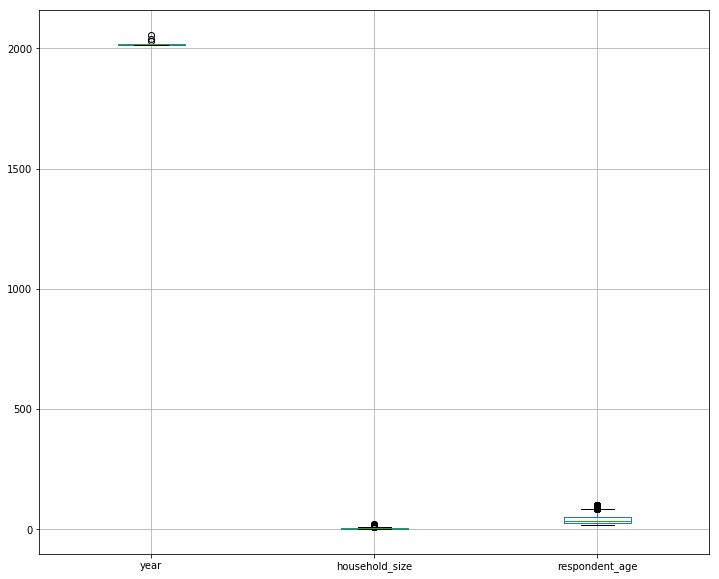

In [9]:
#checking the dataset for outliers
finance.boxplot(figsize = (12,10))
#year,household_size and respondent age have outliers

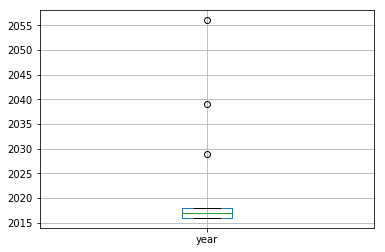

In [0]:
#checking the column 'year' for outliers
finance.boxplot(['year'])

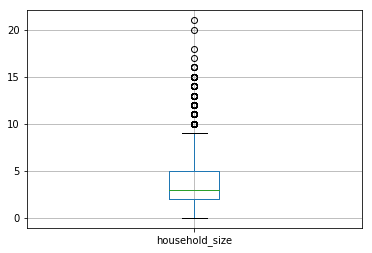

In [0]:
#checking the column 'household_size' for outliers
finance.boxplot(['household_size'])

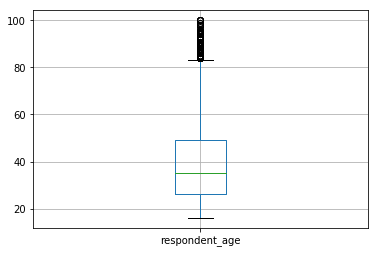

In [0]:
#checking the column 'respondent_age' for outliers
finance.boxplot(['respondent_age'])

In [0]:
#dropping the rows that are unnecessary since the values are same for each respondent in every country
finance.drop(['uniqueid'], axis = 1, inplace = True)

In [7]:
finance.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [8]:
#median value for the year column
finance.year.median()

2017.0

In [9]:
#checking for the index of the outliers in the year column
finance.loc[finance['year'].isin([2029,2056,2039])]


,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of _education,type_of_job
213,Kenya,2029,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [0]:
#for the year column, i shall replace the outliers with the median value of the column year which is 2017.
#213,308 and 7014 are the columns where the year has been replaced by the median value
finance.loc[213,'year'] = 2017
finance.loc[308,'year'] = 2017
finance.loc[7014,'year'] = 2017

In [11]:
#checking to see the changes have been made so as to remain with the years under study
finance.year.unique()

array([2018, 2017, 2016])

In [12]:
#iterating through all columns for unique values in the dataset
for i in finance.columns:
  #to print a line in between the columns
  print('\n')
  print(finance[i].unique())



['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']


[2018 2017 2016]


['Yes' 'No' nan]


['Rural' 'Urban' nan]


['Yes' 'No' nan]


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]


['Female' 'Male' nan]


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]


['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education

In [16]:
#seeing as the dataset has outliers, first I shall check for the null values 
#in the dataset
finance.isna().sum()


country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of _education       29
type_of_job               30
dtype: int64

In [13]:
#the nan values seem not to be many
#I opt for the option of dropping all the nan values in the dataset and 
#creating a new dataframe financeone

financeone = finance.dropna()
#previewing the first five recoreds in the dataset
financeone.head(5)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of _education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [14]:
#confirming that the new dataset has no nan values
#they all show sum of 0, hence no nan values in the dataset
financeone.isna().sum()

country                   0
year                      0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of _education       0
type_of_job               0
dtype: int64

## Univariate analysis





### Frequency Distribution

In [15]:
#Frequency table of the dataset using cross tab between country and has a bank account column
#financeone.value_counts()
frequencies = pd.crosstab(index=financeone["country"], columns=[financeone["has_a_bank_account"]],margins = True)
frequencies

has_a_bank_account,No,Yes,All
country,,,
Kenya,4544,1520,6064
Rwanda,7687,997,8684
Tanzania,5901,599,6500
Uganda,1914,181,2095
All,20046,3297,23343


In [0]:
#from the table above, 4544 kenyans don't have a bank account while 1520 kenyans do have an account
#7687 Rwandese do not have a bank account while 997 have accounts
#5901 Tanzanians do not have an account while 599 do have accounts
#1914 Ugandans dont have a bank account while only 181 have accounts
#Rwanda has more people with no bank accounts while Kenya has the highest number of people with bank accounts  

In [16]:
frequency = pd.crosstab(index=financeone["gender_of_respondent"], columns=[financeone["has_a_bank_account"]],margins = True)
frequency

has_a_bank_account,No,Yes,All
gender_of_respondent,,,
Female,12287,1480,13767
Male,7759,1817,9576
All,20046,3297,23343


In [0]:
#12287 females do not have bank accounts compared to 7759 males
#1480 females have bank accounts compared to 1870 males
#both genders combined, only 3297 have bank accounts with majority of the respondents not owning one

### Bar Charts and Histograms
This will show distribution from grouping segments together


In [21]:
financeone.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of _education', 'type_of_job'],
      dtype='object')

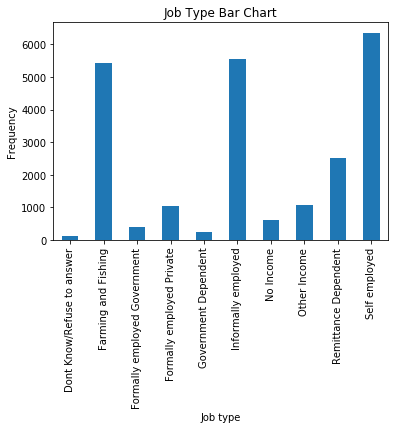

In [38]:
#A bar graph showing the distribution of the type of job column
financeone['type_of_job'].value_counts().sort_index().plot.bar()
plt.title('Job Type Bar Chart')
plt.xlabel('Job type')
plt.ylabel('Frequency')
plt.show()

Most of the population fall under self employed job category followed by informally employed, farming and fishing. The least job category with few population are the peole who fall under the don't know/refuse to answer category

Text(0.5, 1.0, 'Relationship with head Pie Chart')

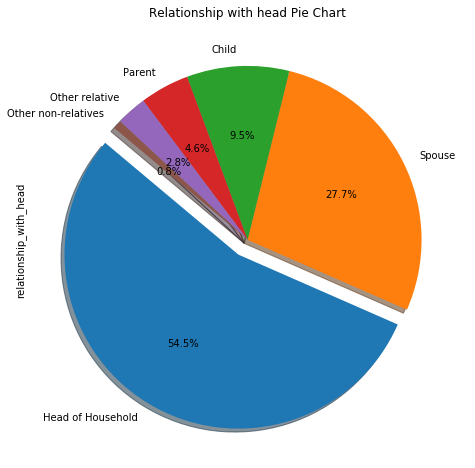

In [84]:
#pie chart to show the various relationship with the head of the family
explode = (0.1,0,0,0,0,0)
financeone.relationship_with_head.value_counts().plot.pie(autopct = '%1.1f%%', explode = explode,shadow = True, startangle = 140,figsize= (15,8))
plt.title('Relationship with head Pie Chart')

Most of the population with 54.5% have a relationship with the head. With 0.8%, population under other than non-relatives have the least relationship with the head

In [96]:
#checking for outliers using kurtosis
financeone.kurt()

year             -1.611651
household_size    1.153869
respondent_age    0.098447
dtype: float64

In [98]:
#checking the skewness of the dataset
financeone.skew()

year              0.042826
household_size    0.974109
respondent_age    0.840662
dtype: float64

Range

In [26]:
# Finding the minimum and maximum age values 
agemax = financeone["respondent_age"].max()
agemin = financeone["respondent_age"].min()

# Calculating the range between the respondent age variable
agemax - agemin

84.0

# Bivariate Analysis

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f266a5748>,
      dtype=object)

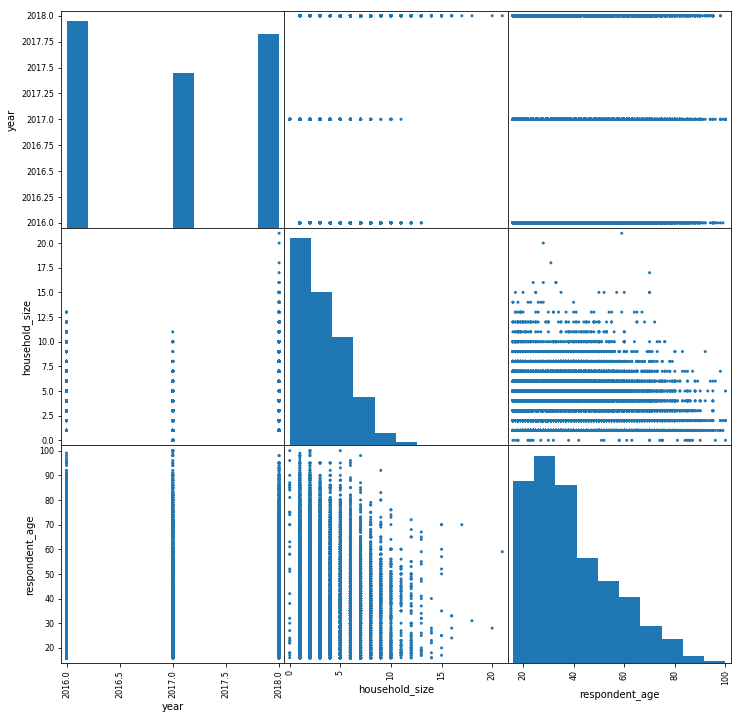

In [100]:
#plotting the scatter plots for my dataset 
#below shows the scatter plots and histograms of all the numerical variables in the data set
fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(financeone, alpha=1, ax=ax)

In [0]:
#the column gender of respondent has yes and no values. Converting the columns to numerical category will ease in analysis 
#of the data set. The same will also be done for the cell phone access and has a bank account column
#converting columns with yes or no values to 1 or 0

financeone['gender_of_respondent'] = financeone.gender_of_respondent.map({'Female':0, 'Male':1})

In [18]:
financeone.gender_of_respondent.unique()

array([0, 1])

In [0]:
financeone['has_a_bank_account'] = financeone.has_a_bank_account.map({'Yes':0, 'No':1})


In [20]:
financeone.has_a_bank_account.unique()

array([0, 1])

In [0]:
financeone['cell_phone_access'] = financeone.cell_phone_access.map({'Yes':0, 'No':1})


In [22]:
financeone.cell_phone_access.unique()

array([0, 1])

In [23]:
# Get dummies so as to convert the categorical variables into numerical variables
#converting them to numerical variables will assist in multi variate analysis  and showing variables that have a correlation
#that will aid in creating the predictive model
dfin = pd.get_dummies(financeone, prefix_sep='_', drop_first=True)
# all the columns with multiple row values have now been converted to columns
#previewing the dummy dataset top rows
dfin.head()

,year,has_a_bank_account,cell_phone_access,household_size,respondent_age,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Urban,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of _education_No formal education,level_of _education_Other/Dont know/RTA,level_of _education_Primary education,level_of _education_Secondary education,level_of _education_Tertiary education,level_of _education_Vocational/Specialised training,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,0,0,3.0,24.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,1,5.0,70.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,0,0,5.0,26.0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2018,1,0,5.0,34.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,1,8.0,26.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [24]:
#using the describe function, the generated table will show the central tendecies of the dataset.
dfin.describe()

,year,has_a_bank_account,cell_phone_access,household_size,respondent_age,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Urban,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of _education_No formal education,level_of _education_Other/Dont know/RTA,level_of _education_Primary education,level_of _education_Secondary education,level_of _education_Tertiary education,level_of _education_Vocational/Specialised training,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
count,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.00000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000,23343.000000
mean,2016.977466,0.858759,0.257422,3.688643,38.805509,0.410230,0.372017,0.278456,0.089749,0.388939,0.545345,0.008097,0.028403,0.045795,0.277214,0.000343,0.458382,0.33856,0.114938,0.191364,0.000343,0.543589,0.180225,0.049008,0.034314,0.232275,0.016536,0.044896,0.010581,0.237759,0.026475,0.046138,0.107484,0.272501
std,0.849081,0.348278,0.437223,2.281184,16.519803,0.491886,0.483353,0.448249,0.285827,0.487520,0.497950,0.089618,0.166123,0.209045,0.447633,0.018510,0.498276,0.47323,0.318954,0.393383,0.018510,0.498107,0.384383,0.215890,0.182039,0.422293,0.127528,0.207079,0.102322,0.425720,0.160546,0.209788,0.309734,0.445256
min,2016.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,1.000000,0.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,1.000000,0.000000,3.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018.000000,1.000000,1.000000,5.000000,49.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2018.000000,1.000000,1.000000,21.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


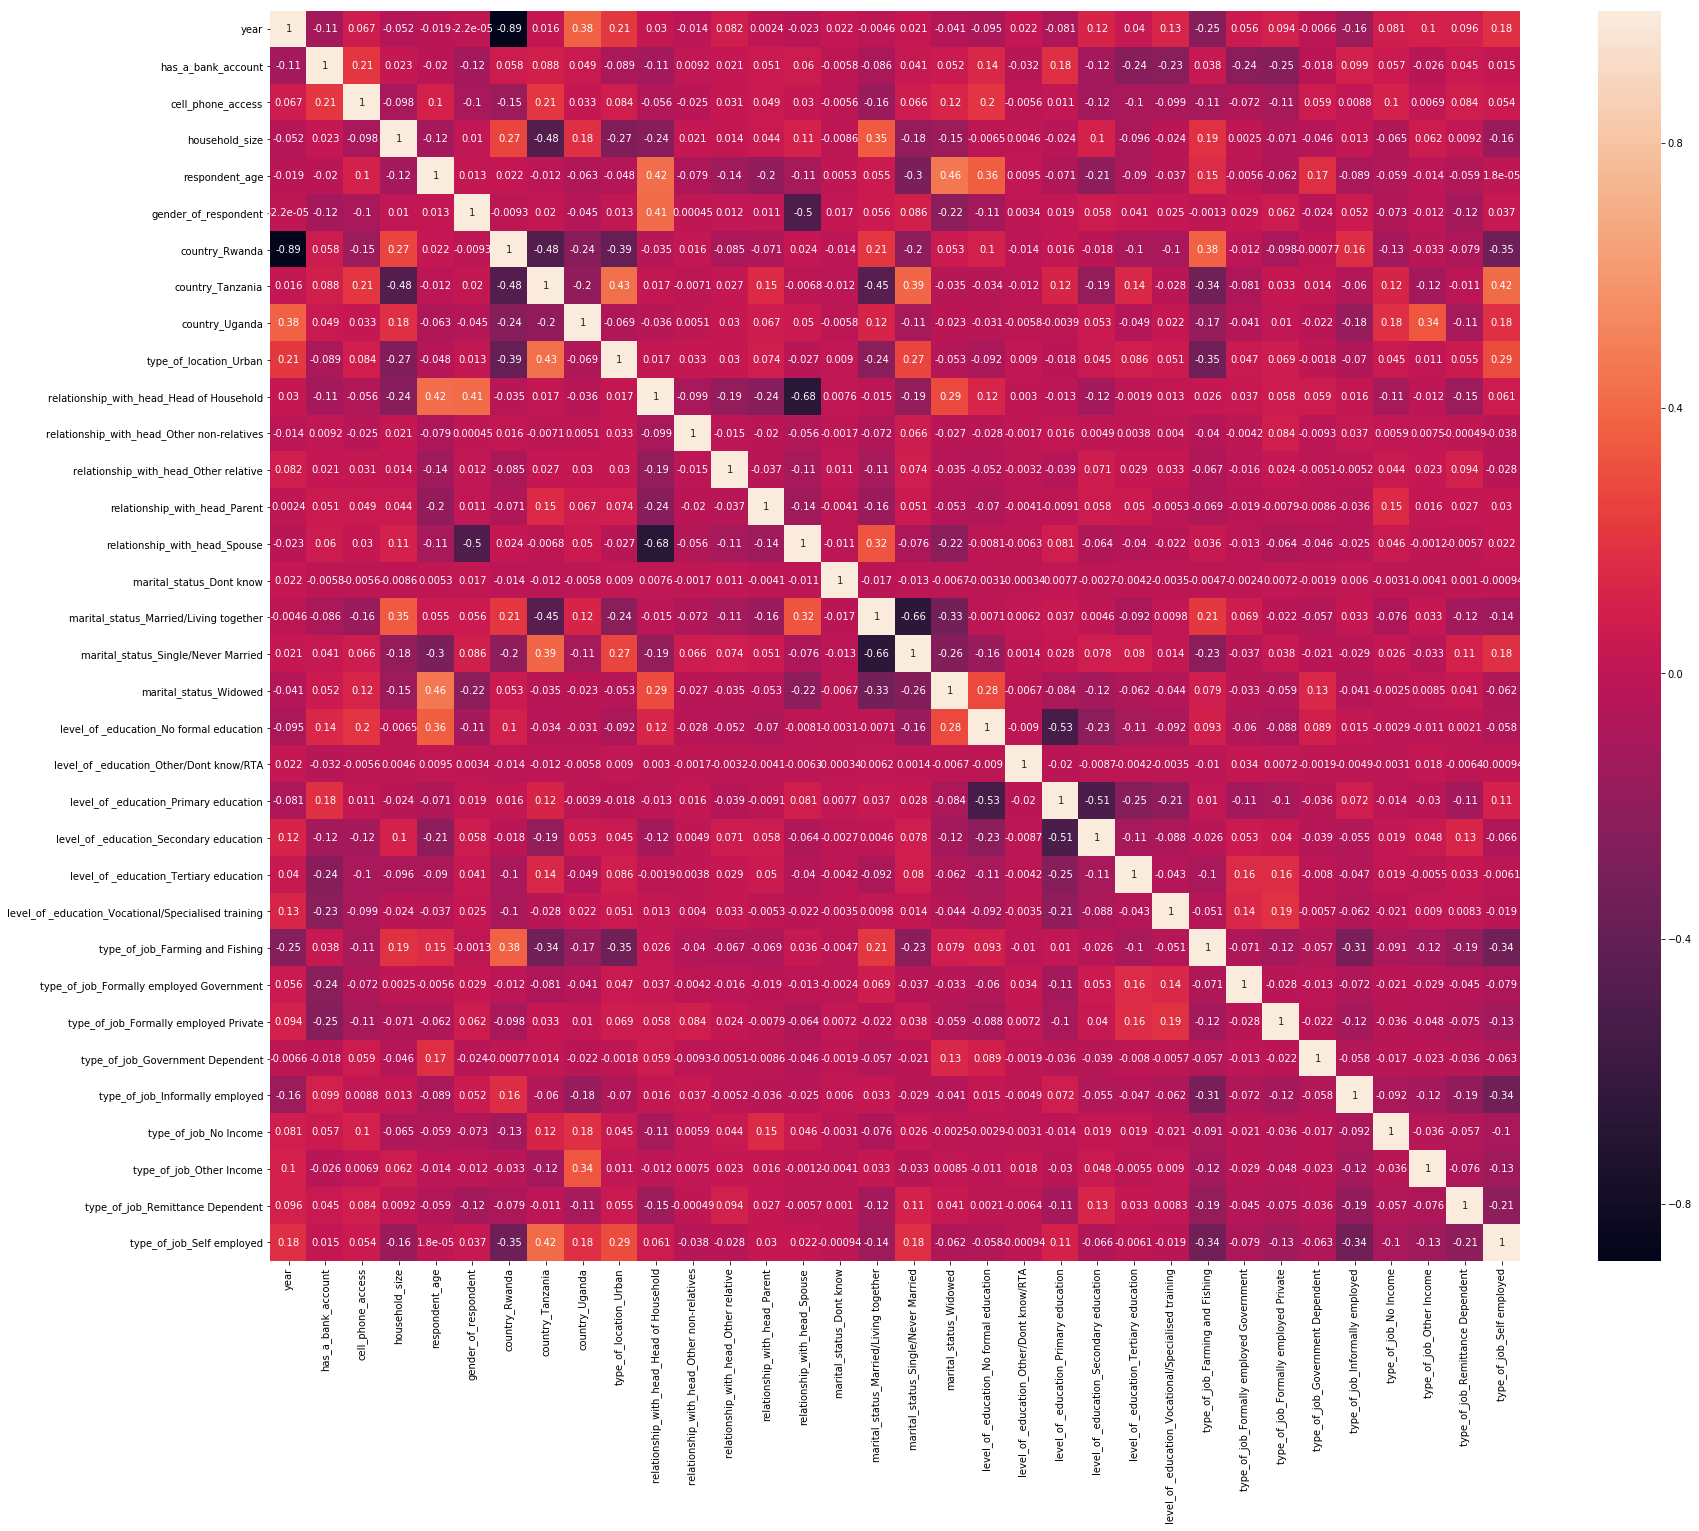

In [25]:
# Checking for correlation among the variables and ploting the summaries and recording our observations

f, ax = plt.subplots(figsize=(28,23))
corr = dfin.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True)


In [0]:
# Crossplots to show the relationships between the variables
sns.pairplot(dfin, diag_kind = 'kde')
plt.figure(figsize=(14, 14))

In [29]:
#checking columns of the dummy dataframe
dfin.columns


Index(['year', 'has_a_bank_account', 'cell_phone_access', 'household_size',
       'respondent_age', 'gender_of_respondent', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Urban',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of _education_No formal education',
       'level_of _education_Other/Dont know/RTA',
       'level_of _education_Primary education',
       'level_of _education_Secondary education',
       'level_of _education_Tertiary education',
       'level_of _education_Vocational/Specialised training',
       'type_of_job_Farming and Fishing',
       'type_of_job_Formally employed Government',
       'ty

In [31]:
#some of the columns that have spaces and / need to be renamed
#I shall replacing ' '(space), / with '_' for ease of reference
dfin.columns = dfin.columns.str.strip().str.replace(' ','_').str.replace('/', '_')
dfin.columns

Index(['year', 'has_a_bank_account', 'cell_phone_access', 'household_size',
       'respondent_age', 'gender_of_respondent', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Urban',
       'relationship_with_head_Head_of_Household',
       'relationship_with_head_Other_non-relatives',
       'relationship_with_head_Other_relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Dont_know', 'marital_status_Married_Living_together',
       'marital_status_Single_Never_Married', 'marital_status_Widowed',
       'level_of__education_No_formal_education',
       'level_of__education_Other_Dont_know_RTA',
       'level_of__education_Primary_education',
       'level_of__education_Secondary_education',
       'level_of__education_Tertiary_education',
       'level_of__education_Vocational_Specialised_training',
       'type_of_job_Farming_and_Fishing',
       'type_of_job_Formally_employed_Government',
       'ty

# Multivariate Analysis

This analysis will be able to show the relationship between a dependent variable and a set of independent variables. For this analysis i shall use the Principal Componet Analysis (PCA), which i will then challenge using the Naive-Bayes algorithm to make predictions and compare the performance.

In [106]:
#using PCA to check for accuracy

#for loop will check for accuracy in all components starting from 2
components = {}
for i in np.arange(1, len(X.columns)+1):
  X = dfin.drop(['has_a_bank_account','year'], 1)
  y = dfin['has_a_bank_account']
  # Splitting the dataset into the Training set and Test set
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  # Standardising the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Applying PCA
  from sklearn.decomposition import PCA
  pca = PCA(n_components = 10)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  # Training and Making Predictions
  # The random forest classification classifier has been used to make predictions.
  from sklearn.linear_model import LogisticRegression
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train, y_train)
  # Predicting the Test set results
  y_pred = classifier.predict(X_test)
  # Performing evaluation
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import accuracy_score
  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  print(cm)
  print(acc)
components.update({'n_components ' + str(i) : 'accuracy ' + str(acc*100)})
components

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 220  618]
 [  89 4909]]
0.8788553803975325
[[ 219  619]
 [  91 4907]]
0.8783413296778616


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 223  615]
 [  91 4907]]
0.8790267306374229
[[ 221  617]
 [  91 4907]]
0.8786840301576422


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 225  613]
 [  90 4908]]
0.8795407813570939
[[ 220  618]
 [  91 4907]]
0.8785126799177518


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 228  610]
 [  95 4903]]
0.8791980808773132
[[ 220  618]
 [  90 4908]]
0.8786840301576422


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 223  615]
 [  93 4905]]
0.8786840301576422
[[ 219  619]
 [  90 4908]]
0.8785126799177518


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 219  619]
 [  91 4907]]
0.8783413296778616
[[ 226  612]
 [  94 4904]]
0.8790267306374229


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 224  614]
 [  92 4906]]
0.8790267306374229
[[ 221  617]
 [  90 4908]]
0.8788553803975325


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 219  619]
 [  88 4910]]
0.8788553803975325
[[ 228  610]
 [  91 4907]]
0.8798834818368746


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 219  619]
 [  89 4909]]
0.8786840301576422
[[ 218  620]
 [  91 4907]]
0.8781699794379713


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 221  617]
 [  92 4906]]
0.8785126799177518
[[ 217  621]
 [  90 4908]]
0.8781699794379713


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 220  618]
 [  89 4909]]
0.8788553803975325
[[ 222  616]
 [  92 4906]]
0.8786840301576422


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 222  616]
 [  92 4906]]
0.8786840301576422
[[ 222  616]
 [  90 4908]]
0.8790267306374229


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 222  616]
 [  95 4903]]
0.8781699794379713
[[ 221  617]
 [  90 4908]]
0.8788553803975325


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 219  619]
 [  90 4908]]
0.8785126799177518
[[ 224  614]
 [  93 4905]]
0.8788553803975325


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 220  618]
 [  90 4908]]
0.8786840301576422
[[ 223  615]
 [  89 4909]]
0.8793694311172036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 230  608]
 [  92 4906]]
0.8800548320767649
[[ 223  615]
 [  96 4902]]
0.8781699794379713


{'n_components 32': 'accuracy 87.81699794379712'}

From the PCA analysis, the accuracy will be 87.8% with correct predictions of with all 32 components
The highest accuracy is 88% with 31 components.

Checking for accuracy and model evaluation using the Naives-Bayes algorithm. This is to challenge the outcome of the PCA analysis.

In [38]:
# dropping the 'has bank account' and 'year' column so as to set has a bank account as the target
cols = [col for col in dfin.columns if col not in ['has_a_bank_account','year']]
#creating a new data set without the target column
data = dfin[cols]
#assigning the has a bank account column as target
target = dfin['has_a_bank_account']
#displaying the first two observations of the dataset data
data.head(n=2)

,cell_phone_access,household_size,respondent_age,gender_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Urban,relationship_with_head_Head_of_Household,relationship_with_head_Other_non-relatives,relationship_with_head_Other_relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont_know,marital_status_Married_Living_together,marital_status_Single_Never_Married,marital_status_Widowed,level_of__education_No_formal_education,level_of__education_Other_Dont_know_RTA,level_of__education_Primary_education,level_of__education_Secondary_education,level_of__education_Tertiary_education,level_of__education_Vocational_Specialised_training,type_of_job_Farming_and_Fishing,type_of_job_Formally_employed_Government,type_of_job_Formally_employed_Private,type_of_job_Government_Dependent,type_of_job_Informally_employed,type_of_job_No_Income,type_of_job_Other_Income,type_of_job_Remittance_Dependent,type_of_job_Self_employed
0,0,3.0,24.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,5.0,70.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [107]:
#split data set into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 0)
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.8603455661859203


With Naives- Bayes algorithm, the prediction accuracy of the model is 86%

## Linear Regression 

The linear regression model would predict the response Y (has a bank account) on the basis of a single predictor variable X. In this we shall assume there is a linear relationship between X and Y

In [0]:
#I shall create a model that generalises well to new data. 
# Trained data is the data on which the linear regression algorithm shall be applied. 
# 40% of the data will go to the test data and 60% will go in the training set.
#Then I shall test the algorithm on the test data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [0]:
#here the model is created and trained to fit the linear regression model to fit the train data
lm = LinearRegression()
results = lm.fit(X_train,y_train)

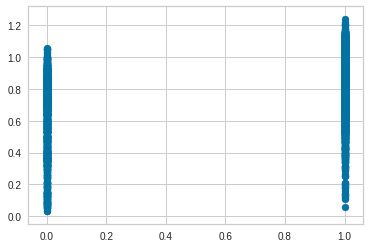

In [49]:
#then look at the predictions generated by the model on the test set
predictions = lm.predict(X_test)
predictions
#the scatter plot below shows the predictions of the test set
plt.scatter(y_test,predictions)

In [50]:
# The coefficient of determination, R2, is the fraction (percentage) of variation in the response variable Y 
# that is explainable by the predictor variable X. It ranges between 0 (no predictability) to 1 (or 100%) 
# which indicates complete predictability.A high R2 indicates being able to predict response variable with less error.
# Brief overview of the Coefficient of determination (http://bit.ly/CoefficientOfDetermination)
# --- 

r2_score(y_test, predictions) 

# the r2 score is 0.2600 approximate, indicating not a good fit.

0.2600629033098453

In [51]:
#there are 32 independent variables and I will need to know the coefficients plus the intercept values that will allow for a prediction

(lm.coef_, lm.intercept_) 

(array([ 6.96011286e-02,  2.64288687e-04, -1.31184135e-03, -3.41400167e-02,
         4.97146221e-02,  1.38899980e-01,  1.68423875e-01, -3.98191462e-02,
        -7.59992413e-02, -5.77152267e-03,  3.11439474e-03, -1.72236254e-02,
        -6.02424668e-02, -1.39289603e-02, -3.34267684e-02, -8.42586437e-03,
        -1.16822103e-02,  1.27019701e-01, -7.02745199e-02,  8.07886105e-02,
        -3.73197084e-02, -2.67584885e-01, -2.61123972e-01,  3.67740415e-02,
        -3.49016011e-01, -2.61033252e-01, -9.56922855e-02,  4.77365439e-02,
        -1.01146638e-02, -7.38757807e-02,  4.87657235e-02, -3.88015844e-02]),
 0.8943261566693701)

In [52]:
#a p value that is less than 0.05 shows that there is a likeley relationship between the feature and the  variable.
# A predictor (an independent variable) that has a low p-value is likely to be a meaningful addition to the model 
#because changes in the predictor's value are related to changes in the response variable.
#A high p-value suggests that changes in the predictor are not associated with changes in the response.

X2 = sm.add_constant(X.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     has_a_bank_account   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     261.6
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        13:07:28   Log-Likelihood:                -4919.7
No. Observations:               23343   AIC:                             9905.
Df Residuals:                   23310   BIC:                         1.017e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8406      0.065     12.887      0.0

In [0]:
#From the output above, the predictor variables that are not significant since their p values are more than 0.05 are x2,x10,x11,x12,x14,x16,x17
#x20,x21,x27,x29,x30,x32. These indicate they they are not statistically significant. Hence they can be removed so as to remain with a model that
#will contain variables with significant p values.

# Simple Random Sampling

This type of random sampling is the most basic probabilistic option used for creating a sample from a population. Every item in the population has an equal chance of being selected.

In [77]:
#From the dataset financeone, I shall choose a random sample of 3000 observations  that i shall use to carry out normality tests
#the sample will be from the already converted numerical dataframe dfin
financesample = financeone.sample(n = 1000, replace = 'False')
#previewing the first 5 rows in the dataset
financesample.head(5)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of _education,type_of_job
6371,Rwanda,2016,1,Urban,0,5.0,42.0,1,Head of Household,Married/Living together,Tertiary education,Informally employed
22487,Uganda,2018,1,Urban,0,5.0,20.0,0,Parent,Single/Never Married,Secondary education,Formally employed Private
14700,Rwanda,2016,1,Rural,0,9.0,38.0,1,Head of Household,Married/Living together,Primary education,Farming and Fishing
22037,Uganda,2018,1,Urban,1,6.0,18.0,0,Parent,Single/Never Married,Primary education,Other Income
15096,Tanzania,2017,1,Urban,0,4.0,44.0,1,Head of Household,Single/Never Married,Primary education,Self employed


In [78]:
financesample.dtypes

country                    object
year                        int64
has_a_bank_account          int64
type_of_location           object
cell_phone_access           int64
household_size            float64
respondent_age            float64
gender_of_respondent        int64
relationship_with_head     object
marital_status             object
level_of _education        object
type_of_job                object
dtype: object

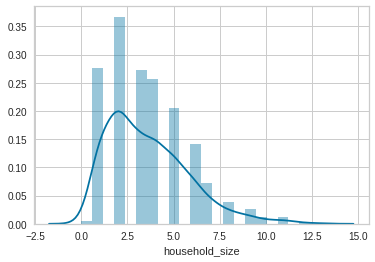

In [80]:
#testing for normality in the sample distribution in household size
sns.distplot(financesample.household_size, kde = True)

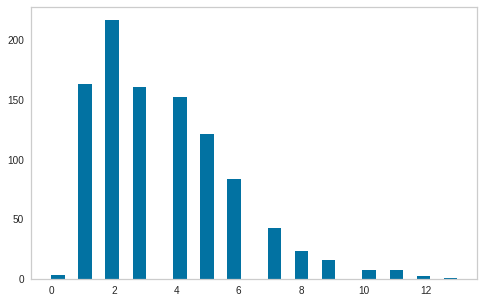

In [85]:
#testing for normality using the histogram
financesample.household_size.hist(bins = 30, figsize = (8,5))

#data distribution still appears skewed to the right

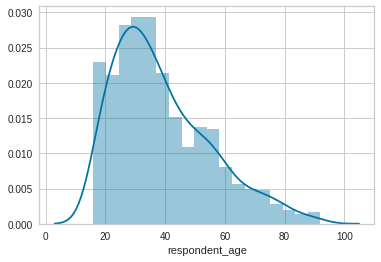

In [98]:
##testing for normality in the sample distribution in household size
sns.distplot(financesample.respondent_age, kde = True)

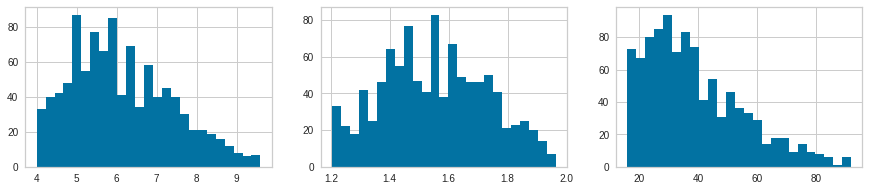

In [101]:
#the distribution of the household size and respondent age is skewed to the right. 
#I shall apply gausian to make the distribution appear at least normal using log to base 10 of x and the square root
#
log_age = financesample.respondent_age.apply(np.log10)
root_age = financesample.respondent_age.apply(np.sqrt)
plt.subplot(331)
hist_sqrt_age = root_age.hist(bins=25,figsize=[15,10]) ## sqrt applied to age
plt.subplot(332)
hist_log_age = log_age.hist(bins=25,figsize=[15,10]) ## log10 applied to age
plt.subplot(333)
hist_age = financesample.respondent_age.hist(bins=25,figsize=[15,10]) ## original distribution

using the log to base 10, the respondent age appears normal as shown the middle normal distribution graph. After applying square root the distribution still is skewed to the right. 
The last graph is the original distribution of the age variable

# Hypothesis Testing using Chi Square

I shall use the chi square to test if there is a relationship between the variable ''has a bank account'' and ''respondent age''. 
Let me state the null and alternative hypotheis.

The H0 (Null Hypothesis): There is no relationship between having a bank account and respondent age.

The H1 (Alternative Hypothesis): There is a relationship between having a bank account and respondent age.

Significance level = 0.05


In [113]:
rp.summary_cat(financesample[['has_a_bank_account', 'respondent_age' ]])

,Variable,Outcome,Count,Percent
0,has_a_bank_account,1.0,849,84.9
1,,0.0,151,15.1
2,respondent_age,30.0,51,5.1
3,,35.0,44,4.4
4,,40.0,36,3.6
5,,28.0,36,3.6
6,,25.0,34,3.4
7,,32.0,30,3.0
8,,26.0,30,3.0
9,,45.0,30,3.0


In [118]:
#Chi-square Test of Independence using Researchpy
#allows us to see the cross-tabulation table in terms of column percent, hence allows for comparison between
#the percentage of has a bank account variable and respondent age
table, results = rp.crosstab(financesample['has_a_bank_account'], financesample['respondent_age'], prop= 'col', test= 'chi-square')
    
table

respondent_age                 ...                     
                             16.0   17.0    18.0  ...   91.0   92.0    All
has_a_bank_account                                ...                     
0                             0.0   12.5    4.55  ...    0.0    0.0   15.1
1                           100.0   87.5   95.45  ...  100.0  100.0   84.9
All                         100.0  100.0  100.00  ...  100.0  100.0  100.0

[3 rows x 75 columns]

In [119]:
#let's see the results of the chi test
results

,Chi-square test,results
0,Pearson Chi-square ( 73.0) =,69.4738
1,p-value =,0.5953
2,Cramer's V =,0.2636


There is no statistically significant relationship between having a bank account and the respondent age. Pearson chi square = 69.4738, p value = 0.5953 which is above the significance level. Cramer's value = 0.2636.
Thus, conclusion is to fail to accept the null hypothesis